# IT Salary Survey for EU region (2018-2020) - Exploratory Data Analysis
Project made for presentation of data exploration skills. [Data](https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region) used in this project comes from Kaggle website. Demanding datasets contains different features, missing values and mixed data types. These aspects will put to the test my ability of handling tough and deficient datasets. 

### Imports

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import warnings

from scipy import stats

%matplotlib inline
warnings.filterwarnings('ignore')

### Data load

In [2]:
Salary2018 = pd.read_csv('../Data/IT Salary Survey EU 2018.csv')
Salary2019 = pd.read_csv('../Data/T Salary Survey EU 2019.csv')
Salary2020 = pd.read_csv('../Data/IT Salary Survey EU  2020.csv')

### Datasets merge
In this project it is assumed that the business concerned wants data from three years together and only common features should be taken under consideration. This part of project focus on preparing individual datasets and its columns for join.

In [3]:
Salary2018.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [4]:
Salary2018.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Current Salary', 'Salary one year ago',
       'Salary two years ago', 'Are you getting any Stock Options?',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')

In [5]:
Salary2018.rename(columns={'Your level':'Seniority level',
                           'Are you getting any Stock Options?':'Stock options',
                           'Salary one year ago':'Salary YA',
                           'Current Salary':'Salary',
                           'Years of experience':'Experience',
                           'Main language at work':'Work language'
                           }, inplace=True)
Salary2018.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Experience',
       'Seniority level', 'Salary', 'Salary YA', 'Salary two years ago',
       'Stock options', 'Work language', 'Company size', 'Company type'],
      dtype='object')

In [6]:
Salary2018.drop(axis=1, columns=['Salary two years ago'], inplace=True)

In [7]:
Salary2018['Year'] = 2018

In [8]:
Salary2019.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [9]:
Salary2019.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')

In [10]:
Salary2019.rename(columns={'Zeitstempel':'Timestamp',
                           'Position (without seniority)':'Position',
                           'Yearly brutto salary (without bonus and stocks)':'Salary',
                           'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country':'Salary YA',
                           'Years of experience':'Experience',
                           'Main language at work':'Work language'
                           }, inplace=True)
Salary2019.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Seniority level', 'Position',
       'Experience', 'Your main technology / programming language', 'Salary',
       'Yearly bonus', 'Yearly stocks', 'Salary YA',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Work language', 'Company name ', 'Company size', 'Company type',
       'Сontract duration', 'Company business sector', '0'],
      dtype='object')

In [11]:
Salary2019['Yearly stocks'].value_counts(dropna=False)

NaN         788
1.0          43
0.0          31
2000.0        8
10000.0       8
           ... 
117000.0      1
350000.0      1
1500.0        1
125.0         1
2500.0        1
Name: Yearly stocks, Length: 62, dtype: int64

In [12]:
Salary2019['Yearly bonus'].value_counts(dropna=False)

NaN        461
0.0        123
5000.0      56
3000.0      30
10000.0     26
          ... 
9600.0       1
4100.0       1
23000.0      1
47000.0      1
8052.0       1
Name: Yearly bonus, Length: 92, dtype: int64

In [13]:
def bonus(row):
    if row['Yearly stocks'] > 0.0:
        return 'Yes'
    else:
        return 'No'

In [14]:
Salary2019['Stock options'] = Salary2019.apply(lambda row: bonus(row), axis=1)

In [15]:
Salary2019['Year'] = 2019

In [16]:
Salary2019.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Seniority level', 'Position',
       'Experience', 'Your main technology / programming language', 'Salary',
       'Yearly bonus', 'Yearly stocks', 'Salary YA',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Work language', 'Company name ', 'Company size', 'Company type',
       'Сontract duration', 'Company business sector', '0', 'Stock options',
       'Year'],
      dtype='object')

In [17]:
Salary = pd.concat([Salary2018, Salary2019], join='inner')
Salary

,Timestamp,Age,Gender,City,Position,Experience,Seniority level,Salary,Salary YA,Stock options,Work language,Company size,Company type,Year
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,No,Deutsch,100-1000,Product,2018
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,No,Deutsch,50-100,Product,2018
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,No,Deutsch,1000+,Product,2018
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,Yes,English,1000+,Product,2018
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,No,English,100-1000,Ecom retailer,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,07.01.2020 09:23:01,30.0,Male,Amsterdam,Backend Developer,10.0,Senior,71000.0,64000.0,No,English,1000+,Product,2019
987,07.01.2020 10:08:18,28.0,Male,Amsterdam,Security Engineer,7.0,Senior,72000.0,67000.0,No,English,1000+,Bank,2019
988,07.01.2020 16:52:43,42.0,Male,Munich,Manager,9.0,Senior,68000.0,67000.0,No,English,1000+,Product,2019
989,08.01.2020 11:18:41,33.0,Male,Berlin,Software Architect,15.0,Senior,100000.0,93000.0,No,English,1000+,Product,2019


In [18]:
Salary2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [19]:
Salary2020.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [20]:
Salary2020.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR':'Salary',
                           'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Salary YA',
                           'Total years of experience':'Experience',
                           'Main language at work':'Work language'
                           }, inplace=True)
Salary2020.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Experience',
       'Years of experience in Germany', 'Seniority level',
       'Your main technology / programming language',
       'Other technologies/programming languages you use often', 'Salary',
       'Yearly bonus + stocks in EUR', 'Salary YA',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Work language', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
      dtype='object')

In [21]:
Salary2020['Year'] = 2020

In [22]:
Salary2020['Yearly bonus + stocks in EUR'].sample(20)

319       NaN
289         0
959        Na
990       NaN
13        NaN
1076     7200
334         0
230     18000
589       NaN
917         0
1107        0
205      5000
287      8000
710       NaN
386       NaN
426       NaN
154       NaN
514       NaN
193       NaN
155       NaN
Name: Yearly bonus + stocks in EUR, dtype: object

In [23]:
def bonus(row): 
    try:
        if int(row['Yearly bonus + stocks in EUR']) > 0.0:
            return 'Yes'
        else:
            return 'No'
    except:
        return 'No'

In [24]:
Salary2020['Stock options'] = Salary2020.apply(lambda row: bonus(row), axis=1)

In [25]:
Salary2020.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Experience',
       'Years of experience in Germany', 'Seniority level',
       'Your main technology / programming language',
       'Other technologies/programming languages you use often', 'Salary',
       'Yearly bonus + stocks in EUR', 'Salary YA',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Work language', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
       'Year', 'Stock options'],
      dtype='object')

In [26]:
Salary.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Experience',
       'Seniority level', 'Salary', 'Salary YA', 'Stock options',
       'Work language', 'Company size', 'Company type', 'Year'],
      dtype='object')

In [27]:
Salary = pd.concat([Salary, Salary2020], join='inner')
Salary.reset_index(drop=True, inplace=True)
Salary

,Timestamp,Age,Gender,City,Experience,Seniority level,Salary,Salary YA,Stock options,Work language,Company size,Company type,Year
0,14/12/2018 12:41:33,43.0,M,München,11.0,Senior,77000.0,76200.0,No,Deutsch,100-1000,Product,2018
1,14/12/2018 12:42:09,33.0,F,München,8.0,Senior,65000.0,55000.0,No,Deutsch,50-100,Product,2018
2,14/12/2018 12:47:36,32.0,M,München,10.0,Senior,88000.0,73000.0,No,Deutsch,1000+,Product,2018
3,14/12/2018 12:50:15,25.0,M,München,6.0,Senior,78000.0,55000.0,Yes,English,1000+,Product,2018
4,14/12/2018 12:50:31,39.0,M,München,10.0,Senior,69000.0,60000.0,No,English,100-1000,Ecom retailer,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,18/01/2021 15:05:50,31.0,Male,Berlin,9,Senior,70000.0,70000.0,Yes,English,51-100,Product,2020
3005,18/01/2021 17:46:02,33.0,Male,Berlin,10,Senior,60000.0,48000.0,Yes,English,1000+,Product,2020
3006,18/01/2021 23:20:35,39.0,Male,Munich,15,Lead,110000.0,90000.0,No,English,101-1000,eCommerce,2020
3007,19/01/2021 10:17:58,26.0,Male,Saarbrücken,7,Middle,38350.0,33800.0,Yes,German,101-1000,Product,2020


## Data understanding

In [28]:
Salary.sample(n=10)

,Timestamp,Age,Gender,City,Experience,Seniority level,Salary,Salary YA,Stock options,Work language,Company size,Company type,Year
995,02.12.2019 20:09:51,34.0,Male,Munich,16.0,Senior,85000.0,NaN,No,English,1000+,Product,2019
215,14/12/2018 19:28:23,29.0,M,München,7.0,Senior,40000.0,NaN,No,Deutsch,50-100,Product,2018
1877,24/11/2020 11:59:20,32.0,Female,Kempten,10,Middle,49000.0,NaN,No,English and German,51-100,Product,2020
1582,12.12.2019 09:05:21,40.0,Male,Munich,3.0,Junior,52000.0,1.0,Yes,Deutsch,100-1000,Consulting / Agency,2019
2029,24/11/2020 14:52:12,33.0,Male,Mannheim,6,Middle,49000.0,48000.0,No,English,51-100,Startup,2020
2320,25/11/2020 12:27:53,30.0,Male,Berlin,5,Lead,90000.0,75000.0,Yes,English,1000+,Product,2020
531,18/12/2018 21:43:22,31.0,M,München,7.0,Senior,68000.0,65000.0,No,English,100-1000,Product,2018
990,02.12.2019 19:51:08,31.0,Male,Stuttgart,6.0,Middle,50000.0,NaN,No,Deutsch,1000+,Product,2019
473,18/12/2018 09:00:13,NaN,M,Krakow,10.0,Senior,23162.0,23162.0,No,English,100-1000,Product,2018
2062,24/11/2020 16:05:55,34.0,Male,Berlin,10,Senior,68000.0,68000.0,No,English,11-50,Startup,2020


In [29]:
Salary.describe()

,Age,Salary,Salary YA,Year
count,2780.000000,2.993000e+03,2.084000e+03,3009.000000
mean,32.401079,3.364944e+07,3.053172e+05,2019.162180
std,5.406931,1.827894e+09,1.095130e+07,0.802849
min,20.000000,6.000000e+03,0.000000e+00,2018.000000
25%,29.000000,5.800000e+04,5.500000e+04,2018.000000
50%,32.000000,6.800000e+04,6.500000e+04,2019.000000
75%,35.000000,8.000000e+04,7.500000e+04,2020.000000
max,69.000000,1.000000e+11,5.000000e+08,2020.000000


In [30]:
Salary.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        3009 non-null   object 
 1   Age              2780 non-null   float64
 2   Gender           2985 non-null   object 
 3   City             2980 non-null   object 
 4   Experience       2960 non-null   object 
 5   Seniority level  2960 non-null   object 
 6   Salary           2993 non-null   float64
 7   Salary YA        2084 non-null   float64
 8   Stock options    2986 non-null   object 
 9   Work language    2973 non-null   object 
 10  Company size     2962 non-null   object 
 11  Company type     2918 non-null   object 
 12  Year             3009 non-null   int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 1.7 MB


In [31]:
Salary.isna().sum()

Timestamp            0
Age                229
Gender              24
City                29
Experience          49
Seniority level     49
Salary              16
Salary YA          925
Stock options       23
Work language       36
Company size        47
Company type        91
Year                 0
dtype: int64

## Dataset cleaning

### Droping row with 3 or more NaN values

In [32]:
to_drop = list(Salary[Salary.isna().sum(axis=1) > 2].index)

In [33]:
Salary.drop(index=to_drop, inplace=True)

In [34]:
Salary.isna().sum(axis=1).value_counts()

0    1894
1     923
2     130
dtype: int64

### Cleaning 'Timestamp' column
Data type transforming from string to unified date type.

In [35]:
Salary['Timestamp'].isnull().values.any()

False

In [36]:
Salary['Timestamp'] = pd.to_datetime(Salary.Timestamp)

In [37]:
for i, row in Salary.iterrows():
    Salary.at[i,'Timestamp'] = row['Timestamp'].date()

In [38]:
Salary.sample(n=10)

,Timestamp,Age,Gender,City,Experience,Seniority level,Salary,Salary YA,Stock options,Work language,Company size,Company type,Year
255,2018-12-15,31.0,M,Berlin,11.0,Senior,61000.0,55000.0,No,English,100-1000,Product,2018
2575,2020-11-27,30.0,Male,Berlin,11,Senior,80000.0,75000.0,No,English,101-1000,Product,2020
2497,2020-11-26,28.0,Male,Berlin,8,Lead,67000.0,62000.0,No,English,51-100,Startup,2020
1628,2019-12-15,30.0,Male,Berlin,10.0,Senior,78000.0,75000.0,No,English,100-1000,Product,2019
2056,2020-11-24,NaN,Male,Berlin,7.5,Middle,68000.0,48000.0,Yes,English,101-1000,Product,2020
2060,2020-11-24,35.0,Male,Berlin,10,Senior,63500.0,60000.0,Yes,English,101-1000,Product,2020
51,2018-12-14,29.0,M,NaN,7.0,Middle,50000.0,50000.0,NaN,English,up to 10,Product,2018
196,2018-12-14,24.0,M,München,2.0,Middle,58000.0,24480.0,No,English,10-50,Startup,2018
568,2018-12-19,46.0,M,London,21.0,Middle,90000.0,90000.0,No,English,100-1000,Startup,2018
635,2018-12-22,33.0,M,Stuttgart,12.0,Senior,78000.0,55000.0,No,Deutsch,1000+,Product,2018


### NaN imputation in 'Age' variable

In [39]:
Salary['Age'].value_counts(dropna=False).head(10)

30.0    272
33.0    231
32.0    230
31.0    216
29.0    187
NaN     186
35.0    181
28.0    179
34.0    171
27.0    134
Name: Age, dtype: int64

In [40]:
Salary['Age'].replace({np.NaN},Salary['Age'].median(), inplace=True)
Salary['Age'].value_counts().head(10)

32.0    416
30.0    272
33.0    231
31.0    216
29.0    187
35.0    181
28.0    179
34.0    171
27.0    134
36.0    126
Name: Age, dtype: int64

### Cleaning 'Gender' feature 
Imputing NaN, removing *diverse* value (only two rows).

In [41]:
Salary['Gender'].value_counts(dropna=False)

Male       1853
M           638
Female      343
F           103
NaN           8
Diverse       2
Name: Gender, dtype: int64

In [42]:
Salary['Gender'].replace({'M':'Male', 'F':'Female', np.NaN:'Male'}, inplace=True)
Salary.drop(Salary[Salary['Gender'] == 'Diverse'].index, inplace=True)
Salary['Gender'].value_counts(dropna=False)

Male      2499
Female     446
Name: Gender, dtype: int64

### Cleaning 'City' variable

In [43]:
Salary['City'].value_counts(dropna=False)

Berlin         1383
Munich          469
München         248
Frankfurt       124
Amsterdam       100
               ... 
Cork              1
Marburg           1
Kassel            1
Pforzheim         1
Saarbrücken       1
Name: City, Length: 181, dtype: int64

In [44]:
Salary['City'].isnull().sum()

15

In [45]:
Salary['City'].replace({np.NaN:'Berlin'}, inplace=True)

### Dealing with naming discrepancies in 'Experience' column
Some instances in this column has some kind of description. For data science purposes it's desirable to have numeric variables. Example of one case: *6 (not as a data scientist, but as a lab scientist)*. Also fractions of some numbers are separated by a comma instead of a dot.

In [46]:
Salary['Experience'].value_counts(dropna=False)

10.0              209
5.0               162
8.0               141
10                138
7.0               134
                 ... 
24.0                1
4.5                 1
21.0                1
38.0                1
less than year      1
Name: Experience, Length: 82, dtype: int64

In [47]:
for x in Salary['Experience']:
    if re.search("^[0-9]*[\\.\\,][0-9].*$", str(x)): 
        result = re.search("^([0-9]*[\\.\\,][0-9]).*$", str(x))
        Salary['Experience'].replace(to_replace=x, value=result.group(1), inplace=True)
    elif re.search("^[0-9][\s\\,].*$", str(x)): 
        result = re.search("^([0-9])[\s\\,].*$", str(x))
        Salary['Experience'].replace(to_replace=x, value=result.group(1), inplace=True)

In [48]:
for i, row in Salary.iterrows():  
    try:
        Salary.at[i, 'Experience'] = round(float(row['Experience']))
    except:
        continue

In [49]:
Salary['Experience'].value_counts(dropna=False)

10                      347
5                       296
8                       234
6                       221
7                       218
4                       187
3                       173
12                      163
15                      151
9                       150
2                       140
11                      123
1                        92
13                       84
14                       72
20                       63
16                       47
18                       43
17                       28
NaN                      24
19                       18
0                        16
25                       15
22                        9
30                        7
21                        4
28                        3
27                        2
1,5                       2
23                        2
24                        2
26                        1
40                        1
29                        1
38                        1
2,5                 

In [50]:
Salary['Experience'].replace({'1,5':1,'2,5':2,'15, thereof 8 as CTO':15,'less than year':1},inplace=True)
Salary['Experience'].replace({np.NaN:Salary['Experience'].median()},inplace=True)

In [51]:
Salary['Experience'].dtype

dtype('float64')

### Reducing number of unique values for 'Seniority level'

In [52]:
Salary['Seniority level'].value_counts(dropna=False)

Senior                                       1624
Middle                                        839
Lead                                          198
Junior                                        187
Head                                           49
NaN                                            24
Principal                                       6
intern                                          1
student                                         1
Intern                                          1
Entry level                                     1
Working Student                                 1
C-Level                                         1
no idea, there are no ranges in the firm        1
Student                                         1
No level                                        1
C-level executive manager                       1
Key                                             1
Director                                        1
CTO                                             1


In [53]:
Salary['Seniority level'].replace({np.NaN:'Senior','Head':'Lead','Principal':'Lead'}, inplace=True)

In [54]:
Salary = Salary.loc[Salary['Seniority level'].isin(['Junior', 'Middle', 'Senior', 'Lead'])]

In [55]:
Salary['Seniority level'].value_counts(dropna=False)

Senior    1648
Middle     839
Lead       253
Junior     187
Name: Seniority level, dtype: int64

### Computing NaN values for 'Salary' and 'Salary YA'
For NaN in 'Salary YA' there is calculated mean difference between 'Salary' and 'Salary YA'. Then NaNs are filled with 'Salary' value multiplied by this factor.

In [56]:
Salary['Salary'].isna().values.sum()

1

In [57]:
Salary['Salary'].replace({np.NaN:Salary['Salary'].median()}, inplace=True)

In [58]:
Salary['Salary YA'].isna().values.sum()

854

In [59]:
(Salary['Salary YA'] / Salary['Salary']).mean()

0.9080648910430509

In [60]:
fill = Salary['Salary'] * 0.908
Salary['Salary YA'].fillna(fill, inplace=True)

In [61]:
Salary

,Timestamp,Age,Gender,City,Experience,Seniority level,Salary,Salary YA,Stock options,Work language,Company size,Company type,Year
0,2018-12-14,43.0,Male,München,11.0,Senior,77000.0,76200.0,No,Deutsch,100-1000,Product,2018
1,2018-12-14,33.0,Female,München,8.0,Senior,65000.0,55000.0,No,Deutsch,50-100,Product,2018
2,2018-12-14,32.0,Male,München,10.0,Senior,88000.0,73000.0,No,Deutsch,1000+,Product,2018
3,2018-12-14,25.0,Male,München,6.0,Senior,78000.0,55000.0,Yes,English,1000+,Product,2018
4,2018-12-14,39.0,Male,München,10.0,Senior,69000.0,60000.0,No,English,100-1000,Ecom retailer,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2021-01-18,31.0,Male,Berlin,9.0,Senior,70000.0,70000.0,Yes,English,51-100,Product,2020
3005,2021-01-18,33.0,Male,Berlin,10.0,Senior,60000.0,48000.0,Yes,English,1000+,Product,2020
3006,2021-01-18,39.0,Male,Munich,15.0,Lead,110000.0,90000.0,No,English,101-1000,eCommerce,2020
3007,2021-01-19,26.0,Male,Saarbrücken,7.0,Middle,38350.0,33800.0,Yes,German,101-1000,Product,2020


### 'Stock Options' cleaning

In [62]:
Salary['Stock options'].value_counts(dropna=False)

No     2022
Yes     899
NaN       6
Name: Stock options, dtype: int64

In [63]:
Salary['Stock options'].replace({np.NaN:'Yes'}, inplace=True)

### Reducing number of unique values for 'Work language', 'Company Size' and 'Company Type'

In [64]:
Salary['Work language'].value_counts(dropna=False)

English                                  2321
Deutsch                                   308
German                                    177
Russian                                    77
French                                      8
Polish                                      6
NaN                                         5
Italian                                     5
Spanish                                     4
English and German                          2
Czech                                       2
Русский                                     2
both                                        1
Deuglisch                                   1
50/50                                       1
Dutch                                       1
Ukrainian                                   1
Polish+English                              1
English+Deutsch                             1
Deutsch/Englisch                            1
Team - Russian; Cross-team - English;       1
Russian, English                  

In [65]:
Salary['Work language'].replace({np.NaN:'English','Deutsch':'German'}, inplace=True)
Salary = Salary.loc[Salary['Work language'].isin(['English', 'German', 'Russian'])]

In [66]:
Salary['Company size'].value_counts(dropna=False)

1000+       975
100-1000    613
101-1000    399
50-100      249
10-50       217
11-50       169
51-100      139
up to 10    118
NaN           9
Name: Company size, dtype: int64

In [67]:
Salary['Company size'].replace({np.NaN:'101-1000','100-1000':'101-1000','50-100':'51-100','10-50':'51-100'}, inplace=True)

In [68]:
Salary['Company type'].value_counts(dropna=False).head(20)

Product                 1792
Startup                  570
Consulting / Agency      244
Agency                    72
NaN                       41
Bodyshop / Outsource      30
Bank                       9
University                 8
Outsource                  6
Consulting                 5
Corporation                4
E-commerce                 3
Insurance                  3
Automotive                 3
Outsourcing                3
Media                      2
Ecommerce                  2
Retail                     2
Bank                       2
Outsorce                   2
Name: Company type, dtype: int64

In [69]:
Salary['Company type'].replace({np.NaN:'Product'}, inplace=True)

In [70]:
Salary_temp = Salary.loc[Salary['Company type'].isin(['Product', 'Startup', 'Consulting / Agency'])]
Salary = pd.concat([Salary, Salary_temp])
Salary.drop_duplicates(keep=False, inplace=True)

In [71]:
Salary['Company type'] = 'Other'
Salary = pd.concat([Salary, Salary_temp])

In [72]:
Salary['Company type'].value_counts(dropna=False).head(20)

Product                1833
Startup                 570
Consulting / Agency     244
Other                   233
Name: Company type, dtype: int64

### Last check if there is no NaN values

In [73]:
Salary.isna().sum().sum()

0

### Memory usage optimalization

In [74]:
Salary.head()

,Timestamp,Age,Gender,City,Experience,Seniority level,Salary,Salary YA,Stock options,Work language,Company size,Company type,Year
4,2018-12-14,39.0,Male,München,10.0,Senior,69000.0,60000.0,No,English,101-1000,Other,2018
5,2018-12-14,37.0,Male,München,8.0,Senior,98000.0,96000.0,Yes,German,1000+,Other,2018
9,2018-12-14,30.0,Male,München,8.0,Senior,60000.0,48000.0,No,German,101-1000,Other,2018
18,2018-12-14,44.0,Male,Berlin,17.0,Senior,62500.0,62500.0,No,German,51-100,Other,2018
20,2018-12-14,29.0,Male,München,10.0,Senior,132250.0,92600.0,Yes,English,1000+,Other,2018


In [75]:
Salary.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 4 to 3008
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        2880 non-null   object 
 1   Age              2880 non-null   float64
 2   Gender           2880 non-null   object 
 3   City             2880 non-null   object 
 4   Experience       2880 non-null   float64
 5   Seniority level  2880 non-null   object 
 6   Salary           2880 non-null   float64
 7   Salary YA        2880 non-null   float64
 8   Stock options    2880 non-null   object 
 9   Work language    2880 non-null   object 
 10  Company size     2880 non-null   object 
 11  Company type     2880 non-null   object 
 12  Year             2880 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5 MB


In [76]:
Salary['Age'] = Salary['Age'].astype('int')
Salary['Gender'] = Salary['Gender'].astype('category')
Salary['Experience'] = Salary['Experience'].astype('int')
Salary['Seniority level'] = Salary['Seniority level'].astype('category')
Salary['Salary'] = Salary['Salary'].astype('int')
Salary['Salary YA'] = Salary['Salary YA'].astype('int')
Salary['Stock options'] = Salary['Stock options'].astype('category')
Salary['Work language'] = Salary['Work language'].astype('category')
Salary['Company size'] = Salary['Company size'].astype('category')
Salary['Company type'] = Salary['Company type'].astype('category')
Salary['Year'] = Salary['Year'].astype('category')

In [77]:
Salary.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 4 to 3008
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Timestamp        2880 non-null   object  
 1   Age              2880 non-null   int32   
 2   Gender           2880 non-null   category
 3   City             2880 non-null   object  
 4   Experience       2880 non-null   int32   
 5   Seniority level  2880 non-null   category
 6   Salary           2880 non-null   int32   
 7   Salary YA        2880 non-null   int32   
 8   Stock options    2880 non-null   category
 9   Work language    2880 non-null   category
 10  Company size     2880 non-null   category
 11  Company type     2880 non-null   category
 12  Year             2880 non-null   category
dtypes: category(7), int32(4), object(2)
memory usage: 390.7 KB


## Relationships analysis
Now when dataset is clear, project can be moved forward to closer understanding of relationships between variables.

In [78]:
Salary.shape

(2880, 13)

In [79]:
Salary.describe()

,Age,Experience,Salary,Salary YA
count,2880.000000,2880.000000,2.880000e+03,2.880000e+03
mean,32.424306,8.802431,2.447387e+05,2.379082e+05
std,5.197773,8.600681,9.315663e+06,9.315784e+06
min,20.000000,0.000000,6.000000e+03,0.000000e+00
25%,29.000000,5.000000,5.900000e+04,5.300000e+04
50%,32.000000,8.000000,6.800000e+04,6.200000e+04
75%,35.000000,11.000000,8.000000e+04,7.300000e+04
max,69.000000,383.000000,5.000000e+08,5.000000e+08


50% of the responders is between 29-35 years old. Most common experince is about 8 years and salary 67500 per year. All of these features have similar mean and 2nd quartile. The age value deviates as a standard five years from the mean value. Less than 25% of the responders earns annualy above 77 thousand.

In [80]:
Salary.describe(include='category')

,Gender,Seniority level,Stock options,Work language,Company size,Company type,Year
count,2880,2880,2880,2880,2880,2880,2880
unique,2,4,2,3,5,4,3
top,Male,Senior,No,English,101-1000,Product,2020
freq,2448,1627,1990,2320,1017,1833,1193


75% of the responders are male and a little less speak English during work hours. 

In [81]:
Salary.describe(include=object)

,Timestamp,City
count,2880,2880
unique,141,168
top,2020-11-24,Berlin
freq,446,1387


In [82]:
Salary.nunique()

Timestamp          141
Age                 41
Gender               2
City               168
Experience          35
Seniority level      4
Salary             287
Salary YA          367
Stock options        2
Work language        3
Company size         5
Company type         4
Year                 3
dtype: int64

<AxesSubplot:>

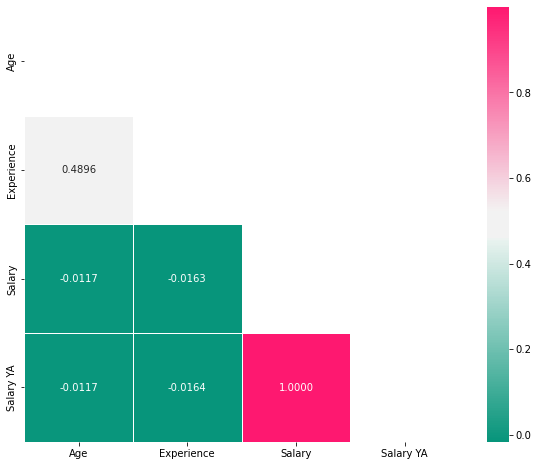

In [83]:
matrix = Salary.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

f, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(h_neg=165, h_pos=0, s=99, l=55, sep=17, as_cmap=True)

sns.heatmap(matrix, mask=mask, cmap=cmap,
            square=True, linewidths=.5, fmt= '.4f', annot=True)

Salary and Salary YA are fully correlated, for prediction purposed Salary YA shouldn't be taken into account. Intermediate correlation occurs between Age and Experience.

<AxesSubplot:xlabel='Timestamp', ylabel='Count'>

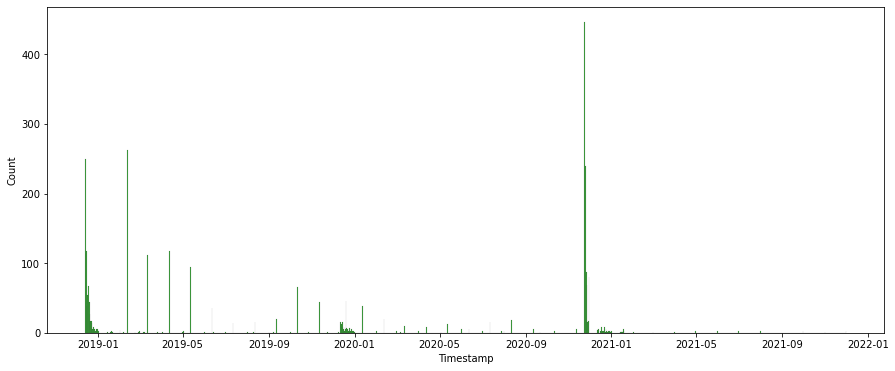

In [84]:
plt.figure(figsize=(15,6))
sns.histplot(Salary, x='Timestamp', color='green')

Most of the surveys were conducted at the end of the calendar year but some companies participated in other moments of the year. 

In [85]:
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='Experience'>

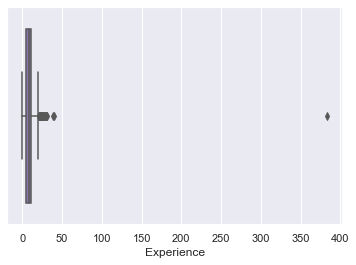

In [86]:
sns.boxplot(data=Salary, x="Experience", palette=['m', 'g'])

One outlier close to 400 is clear error and has to be eliminated.

In [87]:
Salary = Salary[Salary['Experience'] < 50]

<AxesSubplot:xlabel='Experience'>

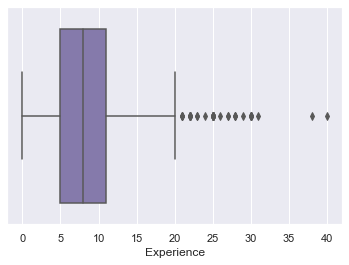

In [88]:
sns.boxplot(data=Salary, x="Experience", palette=['m', 'g'])

These equal 40 years of experience and below are likely true and shouldn't be deleted.

<AxesSubplot:xlabel='Age', ylabel='Experience'>

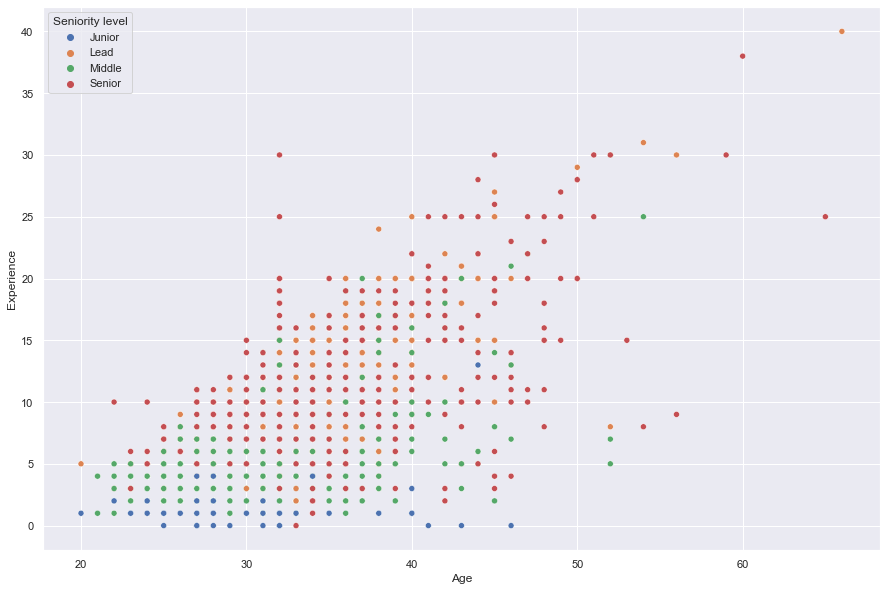

In [89]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Salary, x='Age', y='Experience', hue='Seniority level')

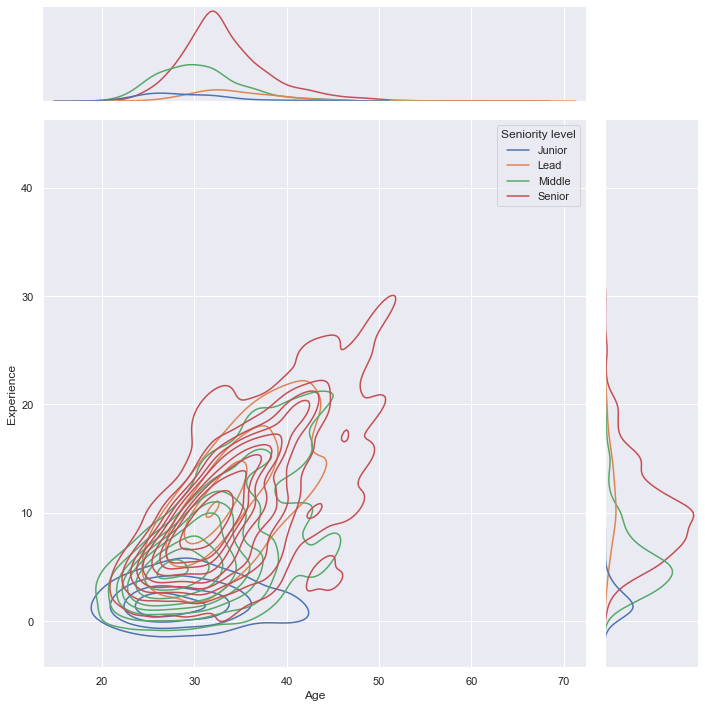

In [90]:
sns.jointplot(data=Salary, x='Age', y='Experience', hue='Seniority level', kind='kde', size=10)

Any work experience under 17 years old is unbelievable and its decided to remove these rows.

In [91]:
Salary = Salary[(Salary['Age'] - Salary['Experience']) > 16]

<AxesSubplot:xlabel='Age', ylabel='Experience'>

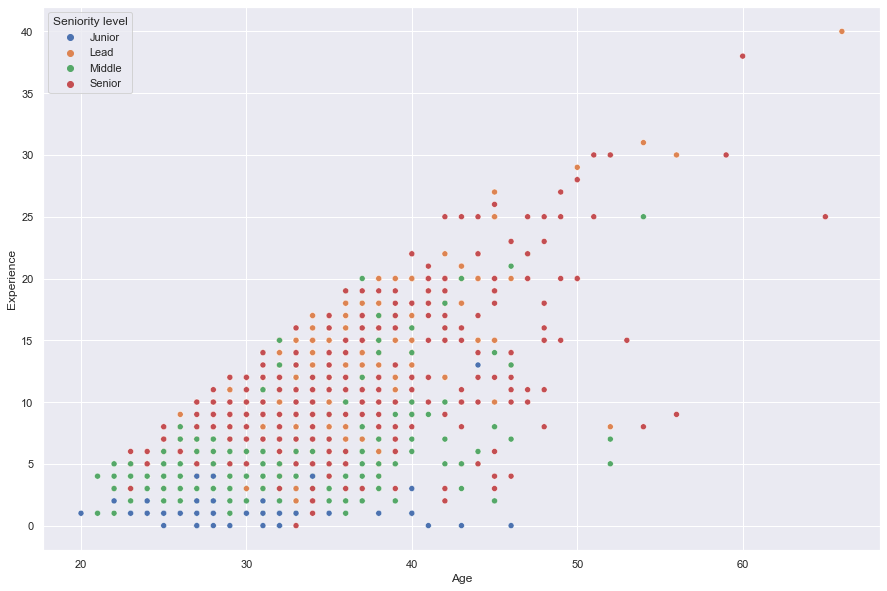

In [92]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Salary, x='Age', y='Experience', hue='Seniority level')

<AxesSubplot:xlabel='Salary'>

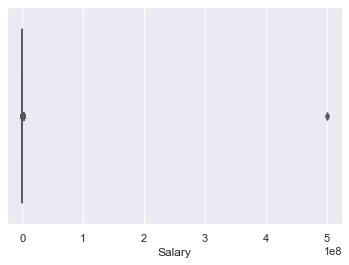

In [93]:
sns.boxplot(data=Salary, x="Salary", palette=['m', 'g'])

Boxplot shows similar situation as with experience variable boxplot, but in this case outliers will be removed will IQR method.

In [94]:
Q1 = np.percentile(Salary['Salary'], 25, interpolation='midpoint')
Q3 = np.percentile(Salary['Salary'], 75, interpolation='midpoint')
IQR = Q3 - Q1

Salary = Salary[Salary['Salary'] <= (Q3+1.5*IQR)]
Salary = Salary[Salary['Salary'] >= (Q1-1.5*IQR)]

<AxesSubplot:xlabel='Salary'>

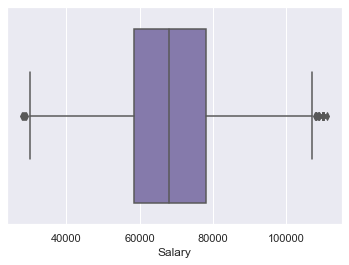

In [95]:
sns.boxplot(data=Salary, x="Salary", palette=['m', 'g'])

<AxesSubplot:xlabel='Salary YA'>

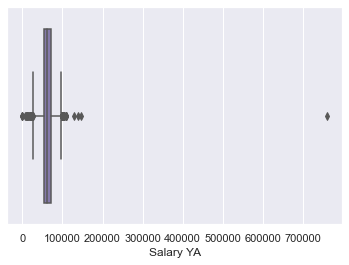

In [96]:
sns.boxplot(data=Salary, x="Salary YA", palette=['m', 'g'])

In [97]:
Q1 = np.percentile(Salary['Salary YA'], 25, interpolation='midpoint')
Q3 = np.percentile(Salary['Salary YA'], 75, interpolation='midpoint')
IQR = Q3 - Q1

Salary = Salary[Salary['Salary YA'] <= (Q3+1.5*IQR)]
Salary = Salary[Salary['Salary YA'] >= (Q1-1.5*IQR)]

<AxesSubplot:xlabel='Salary YA'>

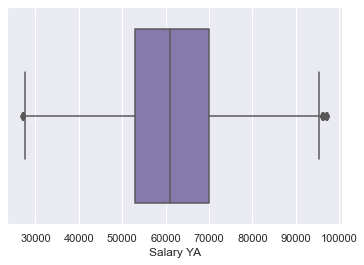

In [98]:
sns.boxplot(data=Salary, x="Salary YA", palette=['m', 'g'])

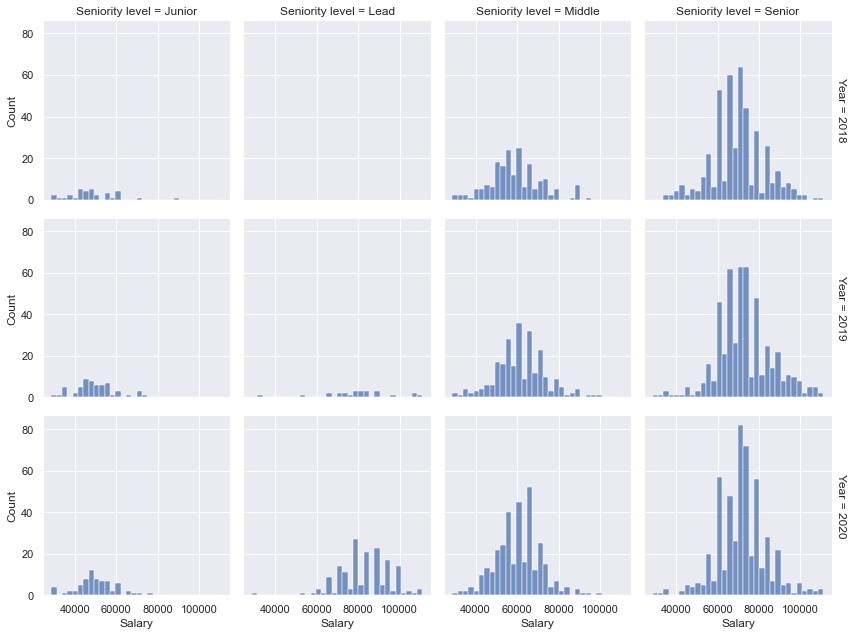

In [99]:
sns.displot(
    Salary, x="Salary", col="Seniority level", row="Year",
    height=3, facet_kws=dict(margin_titles=True),
)

Whats interesting in 2018 none of respondents named himself as lead. Maybe it wasn't an option that year. It can be read from the charts that median annual earnings differ between seniority levels by 10 thousand (Junior\~50k, Mid\~60k, Senior>70k, Lead>80k).

<AxesSubplot:xlabel='Year', ylabel='count'>

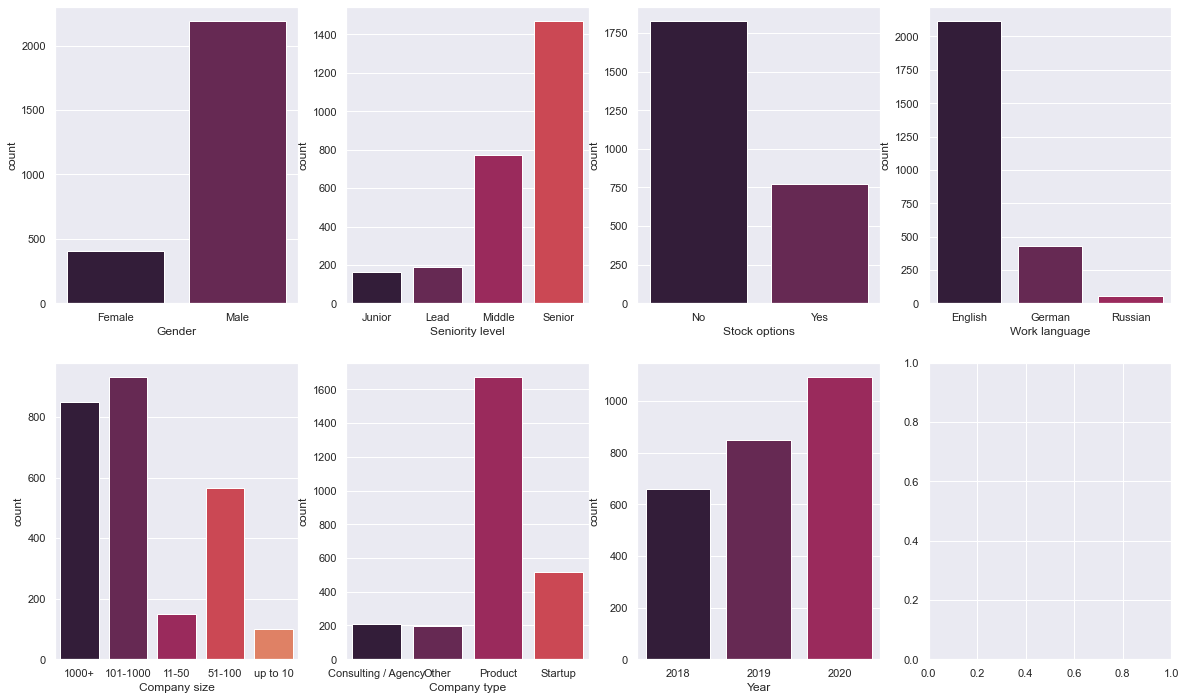

In [100]:
f, ax = plt.subplots(2, 4, figsize=(20,12))
sns.set_palette('rocket')

sns.countplot(ax=ax[0,0], x='Gender', data=Salary)
sns.countplot(ax=ax[0,1], x='Seniority level', data=Salary)
sns.countplot(ax=ax[0,2], x='Stock options', data=Salary)
sns.countplot(ax=ax[0,3], x='Work language', data=Salary)
sns.countplot(ax=ax[1,0], x='Company size', data=Salary)
sns.countplot(ax=ax[1,1], x='Company type', data=Salary)
sns.countplot(ax=ax[1,2], x='Year', data=Salary)

Plots above shows cardinality of individual groups of categorical variables. Cells below presents aprropriate statistical tests for chosen varibles.

In [101]:
corr , p = stats.spearmanr(Salary['Company size'], Salary['Seniority level'])

if p < 0.05:
    print('Correlation between Company size and Seniority level equals: ' + str(corr))
else:
    print('Correlation between Company size and Seniority level is irrevelant.')

Correlation between Company size and Seniority level is irrevelant.


In [102]:
cross_tab = pd.crosstab(Salary['Company type'], Salary['Company size'], margins=False)
print(cross_tab)

Company size         1000+  101-1000  11-50  51-100  up to 10
Company type                                                 
Consulting / Agency     56        65     20      51        15
Other                   94        52      3      38        11
Product                660       643     64     276        31
Startup                 39       173     63     200        43


In [103]:
stat, p, dof, expected = stats.chi2_contingency(cross_tab)
alpha = 0.05

if p <= alpha:
    print('Based on chi-square test, table of contingency and p-value, variables are dependent (reject H0).')
else:
    print('Based on chi-square test, table of contingency and p-value, variables are independent (H0 holds true).')

Based on chi-square test, table of contingency and p-value, variables are dependent (reject H0).


<AxesSubplot:xlabel='Experience', ylabel='Count'>

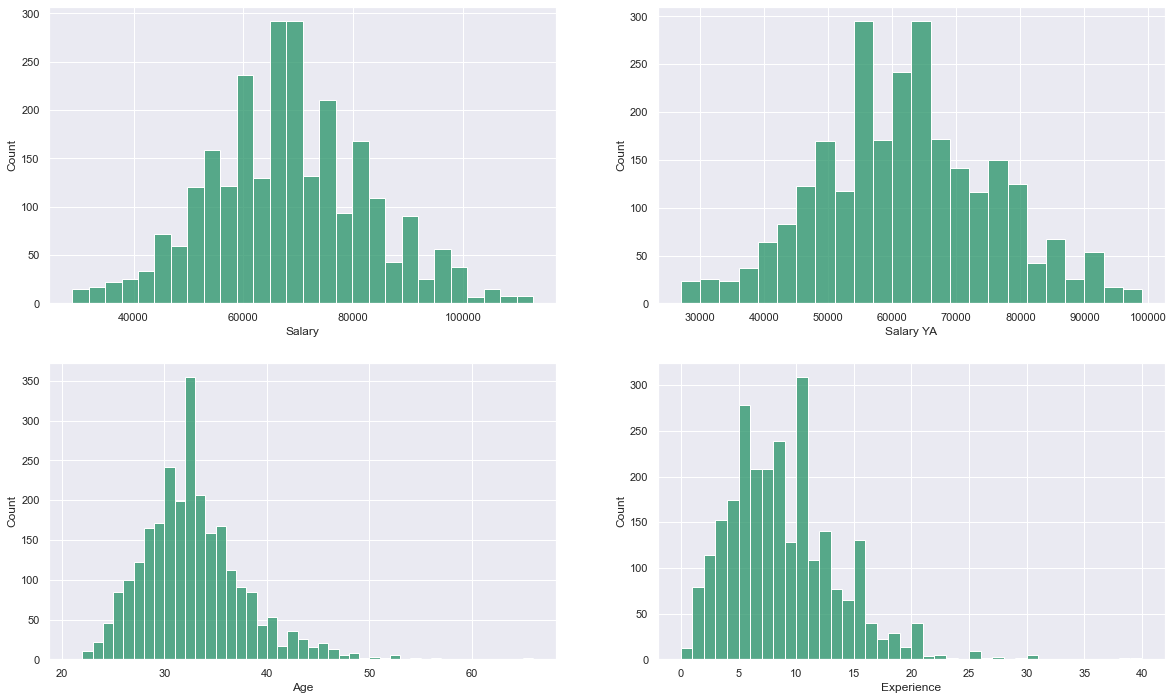

In [104]:
f, ax = plt.subplots(2, 2, figsize=(20,12))
sns.set_palette('summer')

sns.histplot(ax=ax[0,0], x='Salary', binwidth=3000, data=Salary)
sns.histplot(ax=ax[0,1], x='Salary YA', binwidth=3000, data=Salary)
sns.histplot(ax=ax[1,0], x='Age', binwidth=1, data=Salary)
sns.histplot(ax=ax[1,1], x='Experience', binwidth=1, data=Salary)

Salaries distributions are normal while Age and Expirence have right-asymmetric distribution. This asymetry causes high skewness shown in table below. Many predicting models based on statistical principles requires normal distribution of features and if the project target were a prediction, these variables should be transformed.

In [105]:
skew = Salary.skew(numeric_only=True)
skew = pd.DataFrame(skew, columns=['Variable skewness'])
skew

,Variable skewness
Age,1.111445
Experience,1.000867
Salary,0.147535
Salary YA,0.090917


<AxesSubplot:xlabel='Salary', ylabel='Salary YA'>

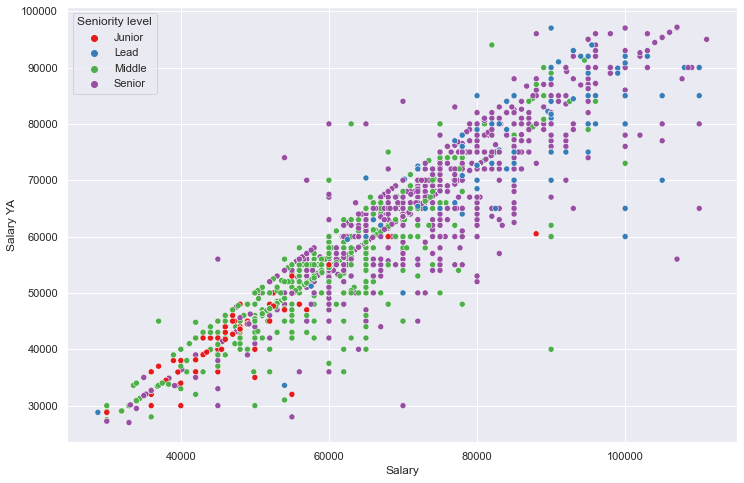

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=Salary, x='Salary', y='Salary YA', hue='Seniority level', palette='Set1')

Text(0, 0.5, 'Salary')

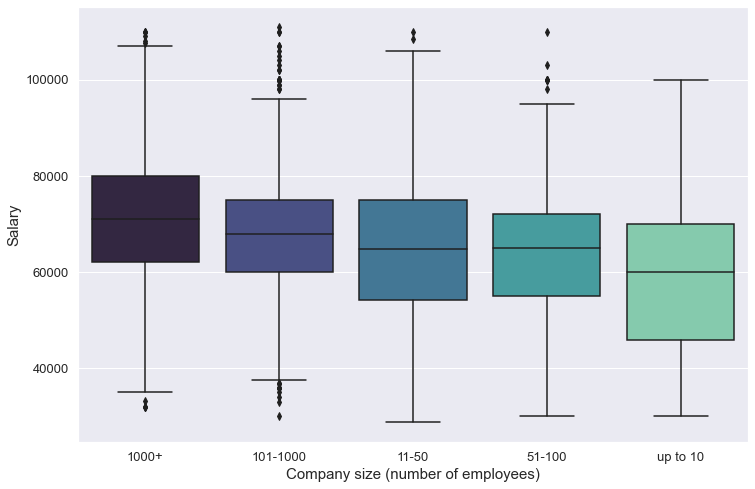

In [107]:
plt.figure(figsize=(12,8))
sns.boxplot(data=Salary, y='Salary', x='Company size', palette='mako')

plt.xticks(fontsize=13)
plt.xlabel('Company size (number of employees)', fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Salary', fontsize=15)

From this boxplot it can be assumed that if IT sector employee want to have possibly high earning he should work for big company. 

<AxesSubplot:xlabel='Company type', ylabel='Salary'>

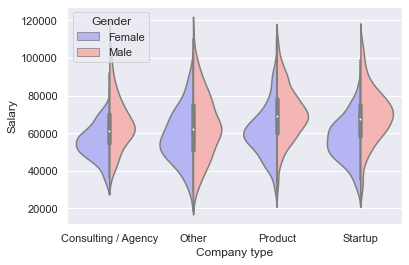

In [108]:
sns.violinplot(data=Salary, y='Salary', x='Company type', hue='Gender', split=True, palette='bwr')

The highest median salary is product development and startups. In every company type male on average earn more than woman, but as it show violin plot below it can be caused because male employees are more experienced on average.

<AxesSubplot:xlabel='Gender', ylabel='Experience'>

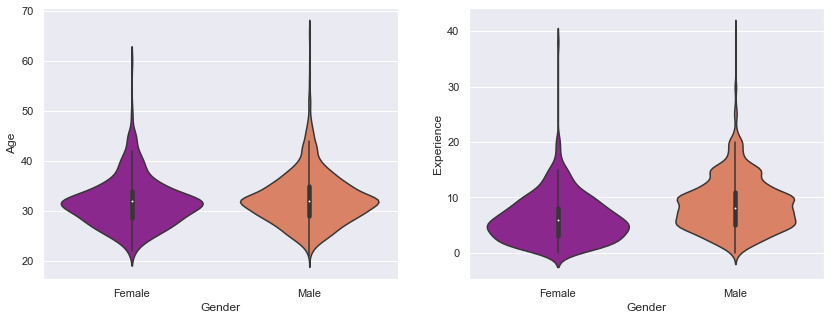

In [109]:
f, ax = plt.subplots(1, 2, figsize=(14,5))

sns.violinplot(ax=ax[0], data=Salary, y='Age', x='Gender', palette='plasma')
sns.violinplot(ax=ax[1], data=Salary, y='Experience', x='Gender', palette='plasma')

In [110]:
Male = Salary[Salary['Gender'] == 'Male']
Female = Salary[Salary['Gender'] == 'Female']

stat, p = stats.mannwhitneyu(x=Female['Experience'], y=Male['Experience'])
alpha = 0.05

if p < alpha:
    print('There is significant differece in medians between the groups.')
else:
    print('Difference in medians between the groups is irrevelant.')

There is significant differece in medians between the groups.


<AxesSubplot:xlabel='Year', ylabel='Salary'>

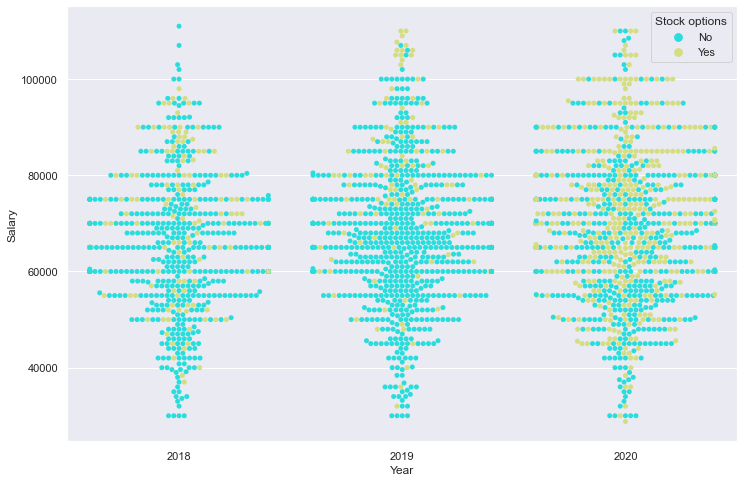

In [111]:
plt.subplots(figsize=(12,8))
sns.swarmplot(data=Salary, x='Year', y='Salary', hue='Stock options', palette='rainbow')

Higher salary more often comes with bonus in stocks. 2020 stock options is more frequent because of common variable for stocks and yearly bonus that year but for exploration purposes its acceptable.  

This exploratory data analysis for sure brought closer features in dataset and pointed out relationships between them. Disordered values in some variable required closer look and feature engineering but effort put into it allowed for clear data visualisation.